# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [84]:
#OpenWeather Key
api_key = weather_api_key
units = "imperial"
#Querying Url for Weather Map.
url = "http://api.openweathermap.org/data/2.5/weather?"
url_query = f"{url}appid={api_key}&units={units}&q="
#City at end of query 
response = requests.get(url_query).json()

In [85]:
#lists for the dataframe
city_name = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# Initialize count 
count_one = 0
set_one = 1

# Populate lists
for city in cities:
    try:
        response = requests.get(url_query + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_name.append(city)
        else:
            count_one += 1
            city_name.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | mataura
City not found. Skipping...
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | nelson bay
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | cape town
City not found. Skipping...
Processing Record 11 of Set 1 | hazorasp
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | yaan
Processing Record 14 of Set 1 | vaini
City not found. Skipping...
Processing Record 15 of Set 1 | mancora
Processing Record 16 of Set 1 | aksarka
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | pevek
City not found. Skipping...
Processing Record 19 of Set 1 | khatanga
City not found. Skipping...
City not found. Skipping...
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of

Processing Record 37 of Set 4 | khani
Processing Record 38 of Set 4 | kununurra
Processing Record 39 of Set 4 | cidreira
City not found. Skipping...
Processing Record 40 of Set 4 | dicabisagan
Processing Record 41 of Set 4 | trairi
Processing Record 42 of Set 4 | sandwick
Processing Record 43 of Set 4 | biak
Processing Record 44 of Set 4 | ngaoundere
Processing Record 45 of Set 4 | adre
Processing Record 46 of Set 4 | eureka
Processing Record 47 of Set 4 | guerrero negro
Processing Record 48 of Set 4 | diamantino
Processing Record 49 of Set 4 | alice town
Processing Record 1 of Set 5 | kitimat
Processing Record 2 of Set 5 | sao jose da coroa grande
Processing Record 3 of Set 5 | mezen
Processing Record 4 of Set 5 | dunedin
Processing Record 5 of Set 5 | kochki
Processing Record 6 of Set 5 | gardez
Processing Record 7 of Set 5 | vostok
Processing Record 8 of Set 5 | candolim
Processing Record 9 of Set 5 | rutland
Processing Record 10 of Set 5 | uige
Processing Record 11 of Set 5 | zyrya

Processing Record 32 of Set 8 | hun
Processing Record 33 of Set 8 | pacific grove
Processing Record 34 of Set 8 | murgab
Processing Record 35 of Set 8 | korla
Processing Record 36 of Set 8 | plouzane
Processing Record 37 of Set 8 | mamallapuram
Processing Record 38 of Set 8 | rio gallegos
Processing Record 39 of Set 8 | muscat
Processing Record 40 of Set 8 | bubaque
Processing Record 41 of Set 8 | tecpan
Processing Record 42 of Set 8 | fortuna
City not found. Skipping...
Processing Record 43 of Set 8 | suluq
Processing Record 44 of Set 8 | isangel
Processing Record 45 of Set 8 | kurchum
Processing Record 46 of Set 8 | kokoda
Processing Record 47 of Set 8 | pangody
City not found. Skipping...
Processing Record 48 of Set 8 | comodoro rivadavia
Processing Record 49 of Set 8 | lensk
Processing Record 1 of Set 9 | murray bridge
Processing Record 2 of Set 9 | francistown
City not found. Skipping...
Processing Record 3 of Set 9 | roanoke rapids
City not found. Skipping...
City not found. Skip

In [86]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_name,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [89]:
# establish dataframe
weather_df = pd.DataFrame(weather_dict)

#Export the city data into a .csv.
weather_df.to_csv('weather_df.csv')

weather_df.count()

City          546
Cloudiness    546
Country       546
Date          546
Humidity      546
Lat           546
Lng           546
Max Temp      546
Wind Speed    546
dtype: int64

In [90]:
#Display the DataFrame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,72,NZ,1579921333,60,-46.19,168.86,66.99,8.01
1,hermanus,0,ZA,1579921242,96,-34.42,19.23,64.99,1.32
2,castro,1,BR,1579921137,98,-24.79,-50.01,56.61,4.47
3,nelson bay,100,NZ,1579921333,58,-41.28,173.28,75.99,1.99
4,arraial do cabo,20,BR,1579921333,77,-22.84,-46.65,66.20,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

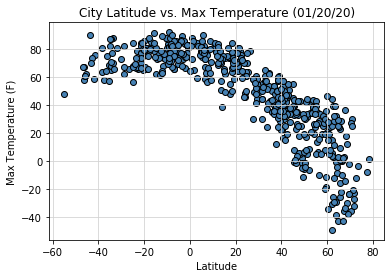

In [91]:
##create a Scatter Plot for Lattitude vs Temperature
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="k",alpha=1,facecolors="steelblue")
plt.title("City Latitude vs. Max Temperature (01/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

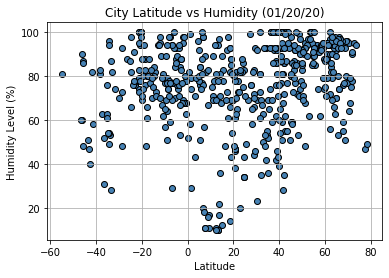

In [104]:
#create a Scatter Plot for Lattitude vs Humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolors="black",facecolors="steelblue")
plt.title("City Latitude vs Humidity (01/20/20)")
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()
#save scatter plot chart
plt.savefig('fig2.png')

#### Latitude vs. Cloudiness Plot

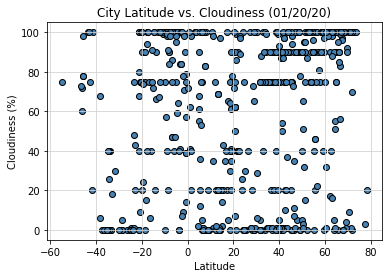

In [105]:
#create a Scatter Plot for Lattitude vs Cloudiness
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="steelblue")
plt.title("City Latitude vs. Cloudiness (01/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

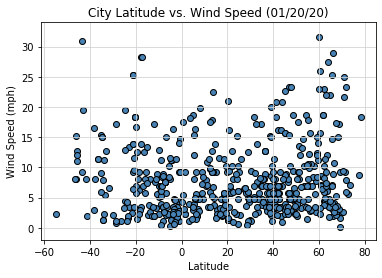

In [106]:
##create a Scatter Plot for Lattitude vs Wind Speed
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="steelblue")
plt.title("City Latitude vs. Wind Speed (01/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig4.png")
plt.show()

## Linear Regression

In [107]:
# OPTIONAL: Create a function to create Linear Regression plots

In [108]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi = weather_df.loc[weather_df['Lat']>0.01]
southern_hemi = weather_df.loc[weather_df['Lat']<-0.01]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.8558040082482403


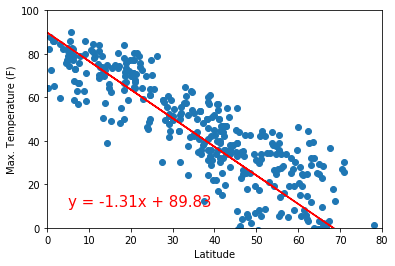

In [109]:
#Create a Scatter Plot for Max Temp vs. Latitude in Northern Hemisphere
x_values = northern_hemi['Lat']
y_values = northern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.xlim(0,80)
plt.ylim(0,100)

plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")

print("The r-squared is :", rvalue)
#save scatter plot chart
plt.savefig("fig5_regress.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.4229942281687476


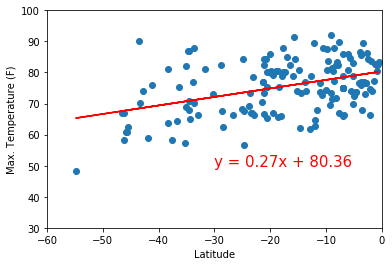

In [110]:
#Create a Scatter Plot for Max Temp vs. Latitude in the Southern Hemisphere
x_values = southern_hemi['Lat']
y_values = southern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

plt.xlim(-60,0,10)
plt.ylim(30,100)

plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")

print("The r-squared is :", rvalue)
#save scatter plot chart
plt.savefig("fig6_regress.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.3712877296836371


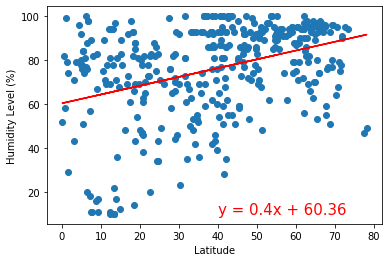

In [111]:
#Create a Scatter Plot for  Humidity (%) vs. Latitude in the Northern Hemisphere
x_values = northern_hemi['Lat']
y_values = northern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")

print("The r-squared is :", rvalue)
#save scatter plot chart
plt.savefig("fig7_regress.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.25197350415373965


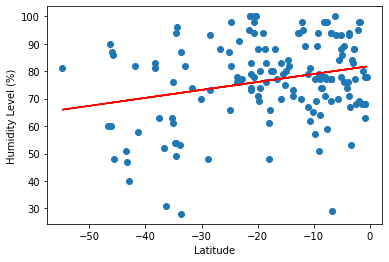

In [112]:
#Create a Scatter Plot for Humidity (%) vs. Latitude in the Southern Hemisphere
x_values = southern_hemi['Lat']
y_values = southern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")

print("The r-squared is :", rvalue)
#save scatter plot chart
plt.savefig("fig8_regress.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.26920375580794237


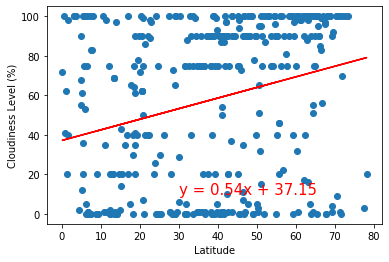

In [113]:
#Create a Scatter Plot for Cloudiness (%) vs. Latitude Northern Hemisphere
x_values = northern_hemi['Lat']
y_values = northern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,10),fontsize=15,color="red")
plt.ylabel("Cloudiness Level (%)")
plt.xlabel("Latitude")

print("The r-squared is :", rvalue)
#save scatter plot chart
plt.savefig("fig9_regress.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.34409013474764805


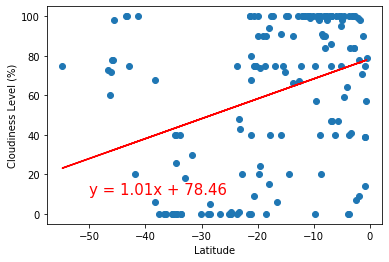

In [114]:
#Create a Scatter Plot for Cloudiness (%) vs. Latitude in the Southern Hemisphere
x_values = southern_hemi['Lat']
y_values = southern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.ylabel("Cloudiness Level (%)")
plt.xlabel("Latitude")

print("The r-squared is :", rvalue)
#save scatter plot chart
plt.savefig("fig10_regress.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.19375019527847154


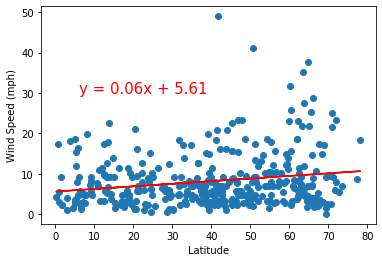

In [115]:
#Create a Scatter Plot for Wind Speed (mph) vs. Latitude in the Northern Hemisphere
x_values = northern_hemi['Lat']
y_values = northern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

print("The r-squared is :", rvalue)
#save scatter plot chart
plt.savefig("fig11_regress.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.2599878725190898


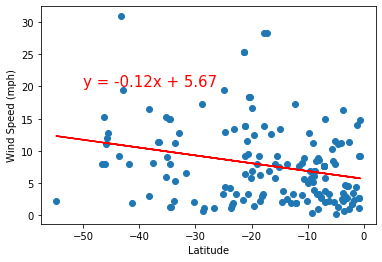

In [116]:
#Create a Scatter Plot for Wind Speed (mph) vs. Latitude in the Southern Hemisphere
x_values = southern_hemi['Lat']
y_values = southern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

print("The r-squared is :", rvalue)
#save scatter plot chart
plt.savefig("fig12_regress.png")